# Lab 2a - Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_df(id = 1):
    if id == 1:
        return pd.DataFrame({
            'Brand': [
                'Acecook', 'Samyang', 'Indomie', 'Mama',
                'Acecook', 'Ottogi', 'Acecook', 'Nongshim',
            ],
            'Product Type': [
                'Pack', 'Pack', 'Pack', 'Pack',
                'Cup', 'Cup', 'Pack', 'Cup'
            ],
            'Average Rating': [
                4.2, 4.6, 4.3, 4.1, 4.4, 4.0, 4.2, 4.5
            ]
        }) 
    elif id == 2:
        return pd.DataFrame({
            'Name': ['Olga', 'Dmitry', np.nan, 'Ivan', 'Anastasia', 'Sergey', 'Elena', np.nan, 'Nikita', 'Alexei'],
            'Age': [25, np.nan, 37, 45, 28, 23, 34, 40, 27, 29],
            'City': ['Moscow', 'Saint Petersburg', 'Novosibirsk', np.nan, 'Kazan', 'Yekaterinburg', np.nan, 'Moscow', 'Saint Petersburg', 'Moscow'],
            'Salary': [60000, 55000, np.nan, 70000, 52000, np.nan, 48000, 50000, 47000, np.nan],
        })
    elif id == 3:
        return pd.DataFrame({
            'Country': [
                'Russia', 'Russian Federation', 'China', 'China', 'Myanmar', 
                'Myanmar', 'Pakistan', 'Pakistan', 'Nigeria', 'Zimbabwe'
            ],
            'Food': [
                'Borscht', 'Pelmeni', 'Peking Duck', 'Hotpot', 'Mohinga', 
                'Tea Leaf Salad', 'Biryani', 'Chapli Kebab', 'Jollof Rice', 'Sadza'
            ],
            'Spicy Level': [
                'Mild', 'Mild', 'Medium', 'High', 'Medium', 
                'Medium', 'High', 'High', 'Medium', 'Mild'
            ]
        })
    elif id == 4:
        return pd.read_csv('../Data/Lab2/pakistan_intellectual_capital.csv').drop(columns='Unnamed: 0')
    elif id == 5:
        return pd.DataFrame({
            'Age': [22, 39, 36, 28, 25, 24, 36, 25, 29, 91],
            # 'Salary': [38586, 63373, 90195, 89933, 83216, 
            #         54724, 80511, 64463, 117454, 106402],
            'Experience_Years': [4, 9, 8, 6, 8, 5, 7, 2, 6, 40],
            'Score': [0.314356, 0.508571, 0.907566, 0.249292, 0.410383, 0.755551, 
                    0.228798, 0.076980, 0.289751, 0.161221]
        })
    elif id == 6:
        return pd.DataFrame({
            'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Green', 'Red'],
            'Size': ['Small', 'Medium', 'Large', 'Small', 'Large', 'Medium', 'Small', 'Large'],
            'Category': ['A', 'B', 'A', 'B', 'A', 'C', 'C', 'B']
        })

## 1. Handle duplicates

In [3]:
df = get_df(1)
df

Brand Product Type  Average Rating
0   Acecook         Pack             4.2
1   Samyang         Pack             4.6
2   Indomie         Pack             4.3
3      Mama         Pack             4.1
4   Acecook          Cup             4.4
5    Ottogi          Cup             4.0
6   Acecook         Pack             4.2
7  Nongshim          Cup             4.5

In [4]:
# Check duplicates
df = get_df(1)
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [5]:
# Get the duplicated row
df[df.duplicated()]

Brand Product Type  Average Rating
6  Acecook         Pack             4.2

In [8]:
# Drop duplicates - keep 'first'/'last'
df = get_df(1)
df = df.drop_duplicates(keep='last')
df

Brand Product Type  Average Rating
1   Samyang         Pack             4.6
2   Indomie         Pack             4.3
3      Mama         Pack             4.1
4   Acecook          Cup             4.4
5    Ottogi          Cup             4.0
6   Acecook         Pack             4.2
7  Nongshim          Cup             4.5

In [ ]:
# Drop duplicated rows using 'subset'
df = get_df(1)
df = df.drop_duplicates('Brand')
df

Brand Product Type  Average Rating
0   Acecook         Pack             4.2
1   Samyang         Pack             4.6
2   Indomie         Pack             4.3
3      Mama         Pack             4.1
5    Ottogi          Cup             4.0
7  Nongshim          Cup             4.5

## 2. Handling missing values

In [10]:
df = get_df(2)
df

Name   Age              City   Salary
0       Olga  25.0            Moscow  60000.0
1     Dmitry   NaN  Saint Petersburg  55000.0
2        NaN  37.0       Novosibirsk      NaN
3       Ivan  45.0               NaN  70000.0
4  Anastasia  28.0             Kazan  52000.0
5     Sergey  23.0     Yekaterinburg      NaN
6      Elena  34.0               NaN  48000.0
7        NaN  40.0            Moscow  50000.0
8     Nikita  27.0  Saint Petersburg  47000.0
9     Alexei  29.0            Moscow      NaN

In [11]:
# Drop all rows of missing values
df.dropna()

Name   Age              City   Salary
0       Olga  25.0            Moscow  60000.0
4  Anastasia  28.0             Kazan  52000.0
8     Nikita  27.0  Saint Petersburg  47000.0

In [13]:
# Drop all columns of missing values
df = get_df(2)
df = df.dropna(axis=1)
df

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
# Drop a specific column based on our knowledge
df = get_df(2)
df = df.drop(columns='Name')
df

Age              City   Salary
0  25.0            Moscow  60000.0
1   NaN  Saint Petersburg  55000.0
2  37.0       Novosibirsk      NaN
3  45.0               NaN  70000.0
4  28.0             Kazan  52000.0
5  23.0     Yekaterinburg      NaN
6  34.0               NaN  48000.0
7  40.0            Moscow  50000.0
8  27.0  Saint Petersburg  47000.0
9  29.0            Moscow      NaN

In [17]:
# Imputation for categorical data - using default values
df = get_df(2)
df[['Name', 'City']] = df[['Name', 'City']].fillna('Unknown')
df

Name   Age              City   Salary
0       Olga  25.0            Moscow  60000.0
1     Dmitry   NaN  Saint Petersburg  55000.0
2    Unknown  37.0       Novosibirsk      NaN
3       Ivan  45.0           Unknown  70000.0
4  Anastasia  28.0             Kazan  52000.0
5     Sergey  23.0     Yekaterinburg      NaN
6      Elena  34.0           Unknown  48000.0
7    Unknown  40.0            Moscow  50000.0
8     Nikita  27.0  Saint Petersburg  47000.0
9     Alexei  29.0            Moscow      NaN

In [20]:
df['City'].mode().values[0]

'Moscow'

In [21]:
# Imputation for categorical data - using mode value
df = get_df(2)
mode_city = df['City'].mode().values[0]
df['City'] = df['City'].fillna(mode_city)
df

Name   Age              City   Salary
0       Olga  25.0            Moscow  60000.0
1     Dmitry   NaN  Saint Petersburg  55000.0
2        NaN  37.0       Novosibirsk      NaN
3       Ivan  45.0            Moscow  70000.0
4  Anastasia  28.0             Kazan  52000.0
5     Sergey  23.0     Yekaterinburg      NaN
6      Elena  34.0            Moscow  48000.0
7        NaN  40.0            Moscow  50000.0
8     Nikita  27.0  Saint Petersburg  47000.0
9     Alexei  29.0            Moscow      NaN

In [22]:
# Fill Salary with mean salary
df = get_df(2)
mean_salary = df['Salary'].mean()
df['Salary'] = df['Salary'].fillna(mean_salary)
df

Name   Age              City        Salary
0       Olga  25.0            Moscow  60000.000000
1     Dmitry   NaN  Saint Petersburg  55000.000000
2        NaN  37.0       Novosibirsk  54571.428571
3       Ivan  45.0               NaN  70000.000000
4  Anastasia  28.0             Kazan  52000.000000
5     Sergey  23.0     Yekaterinburg  54571.428571
6      Elena  34.0               NaN  48000.000000
7        NaN  40.0            Moscow  50000.000000
8     Nikita  27.0  Saint Petersburg  47000.000000
9     Alexei  29.0            Moscow  54571.428571

In [24]:
# Fill Age with median
df = get_df(2)
median_age = df['Age'].median()
print(f'Median of age is {median_age}')
df['Age'] =  df['Age'].fillna(median_age)
df

Median of age is 29.0


Name   Age              City   Salary
0       Olga  25.0            Moscow  60000.0
1     Dmitry  29.0  Saint Petersburg  55000.0
2        NaN  37.0       Novosibirsk      NaN
3       Ivan  45.0               NaN  70000.0
4  Anastasia  28.0             Kazan  52000.0
5     Sergey  23.0     Yekaterinburg      NaN
6      Elena  34.0               NaN  48000.0
7        NaN  40.0            Moscow  50000.0
8     Nikita  27.0  Saint Petersburg  47000.0
9     Alexei  29.0            Moscow      NaN

In [25]:
# Combine all imputation
df = get_df(2)
# Fill name
df['Name'] = df['Name'].fillna('Unknown')

# Fill age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill City with mode
df['City'] = df['City'].fillna(df['City'].mode().values[0])

# Fill Salary with mean
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

df

Name   Age              City        Salary
0       Olga  25.0            Moscow  60000.000000
1     Dmitry  29.0  Saint Petersburg  55000.000000
2    Unknown  37.0       Novosibirsk  54571.428571
3       Ivan  45.0            Moscow  70000.000000
4  Anastasia  28.0             Kazan  52000.000000
5     Sergey  23.0     Yekaterinburg  54571.428571
6      Elena  34.0            Moscow  48000.000000
7    Unknown  40.0            Moscow  50000.000000
8     Nikita  27.0  Saint Petersburg  47000.000000
9     Alexei  29.0            Moscow  54571.428571

## 3. Handling data inconsistency

In [26]:
df = get_df(3)
df

Country            Food Spicy Level
0              Russia         Borscht        Mild
1  Russian Federation         Pelmeni        Mild
2               China     Peking Duck      Medium
3               China          Hotpot        High
4             Myanmar         Mohinga      Medium
5             Myanmar  Tea Leaf Salad      Medium
6            Pakistan         Biryani        High
7            Pakistan    Chapli Kebab        High
8             Nigeria     Jollof Rice      Medium
9            Zimbabwe           Sadza        Mild

In [28]:
# Replace inconsistent values
df = get_df(3)
df['Country'] = df['Country'].replace('Russian Federation', 'Russia')
df

Country            Food Spicy Level
0    Russia         Borscht        Mild
1    Russia         Pelmeni        Mild
2     China     Peking Duck      Medium
3     China          Hotpot        High
4   Myanmar         Mohinga      Medium
5   Myanmar  Tea Leaf Salad      Medium
6  Pakistan         Biryani        High
7  Pakistan    Chapli Kebab        High
8   Nigeria     Jollof Rice      Medium
9  Zimbabwe           Sadza        Mild

In [ ]:
'Russia', 'Russian Federation', 'RF', 'China', 'PRC', 'Myanmar', 'Burma'

In [49]:
# If the inconsistent values are many, use a linrary
# Data source: https://www.kaggle.com/datasets/alexisbcook/pakistan-intellectual-capital
df = get_df(4)
df

S#            Teacher Name           University Currently Teaching  \
0        3         Dr. Abdul Basit               University of Balochistan   
1        5         Dr. Waheed Noor               University of Balochistan   
2        6        Dr. Junaid Baber               University of Balochistan   
3        7     Dr. Maheen Bakhtyar               University of Balochistan   
4       25             Samina Azim  Sardar Bahadur Khan Women's University   
...    ...                     ...                                     ...   
1137  1975        Dr. Ahmar Rashid             Ghulam Ishaq Khan Institute   
1138  1976       Dr. Fawad Hussain             Ghulam Ishaq Khan Institute   
1139  1978    Dr. Rashad M Jillani             Ghulam Ishaq Khan Institute   
1140  1980  Dr. Shahabuddin Ansari             Ghulam Ishaq Khan Institute   
1141  1981         Dr. Sajid Anwar             Ghulam Ishaq Khan Institute   

                            Department Province University Located  \
0                Computer Science & IT                 Balochistan   
1                Computer Science & IT                 Balochistan   
2                Computer Science & IT                 Balochistan   
3                Computer Science & IT                 Balochistan   
4                     Computer Science                 Balochistan   
...                                ...                         ...   
1137  Computer Science and Engineering                         KPK   
1138  Computer Science and Engineering                         KPK   
1139  Computer Science and Engineering                         KPK   
1140  Computer Science and Engineering                         KPK   
1141  Computer Science and Engineering                         KPK   

              Designation Terminal Degree  \
0     Assistant Professor             PhD   
1     Assistant Professor             PhD   
2     Assistant Professor             PhD   
3     Assistant Professor             PhD   
4                Lecturer              BS   
...                   ...             ...   
1137  Associate Professor             PhD   
1138  Associate Professor             PhD   
1139  Assistant Professor             PhD   
1140  Assistant Professor             PhD   
1141  Assistant Professor             PhD   

                                         Graduated from      Country    Year  \
0                         Asian Institute of Technology     Thailand     NaN   
1                         Asian Institute of Technology     Thailand     NaN   
2                         Asian Institute of Technology     Thailand     NaN   
3                         Asian Institute of Technology     Thailand     NaN   
4     Balochistan University of Information Technolo...     Pakistan  2005.0   
...                                                 ...          ...     ...   
1137                                                JNU  South Korea     NaN   
1138                                           Grenoble       France     NaN   
1139                        Florida Atlantic University          USA  2012.0   
1140  Ghulam Ishaq Khan Institute of Science and Tec...     Pakistan     NaN   
1141                          Seoul National University  South Korea     NaN   

              Area of Specialization/Research Interests Other Information  
0                           Software Engineering & DBMS               NaN  
1                                                  DBMS               NaN  
2             Information processing, Multimedia mining               NaN  
3     NLP, Information Retrieval, Question Answering...               NaN  
4                         VLSI Electronics DLD Database               NaN  
...                                                 ...               ...  
1137  Electrical Impedance Tomography, Inverse algor...               NaN  
1138  Machine Learning, Big Data Anaysis, Data Minin...               NaN  
1139  Digital Multimedia Systems, Video Comp

In [50]:
df['Country'].iloc[-1]

'South Korea'

In [30]:
df['Country'].unique()

array(['Thailand', 'Pakistan', 'germany', 'Austria', 'Australia', 'UK',
       'China', 'France', 'USofA', 'SouthKorea', 'Malaysia', 'Sweden',
       'Italy', 'Canada', 'Norway', 'Ireland', 'New Zealand', 'Urbana',
       'Portugal', 'Russian Federation', 'USA', 'Finland', ' USA',
       'Netherland', ' Germany', ' Sweden', ' New Zealand', 'Greece',
       'Turkey', 'South Korea', 'Macau', 'Singapore', 'Spain', 'Japan',
       'HongKong', 'Saudi Arabia', 'Mauritius', 'Scotland'], dtype=object)

In [ ]:
#!pip install -q fuzzywuzzy
# !pip install -q pycountry

In [36]:
import pycountry

country_list = [country.name for country in list(pycountry.countries)]
country_dict = {country.name: country.alpha_2 for country in list(pycountry.countries)}

In [46]:
from fuzzywuzzy import process

def convert_to_code(country_name):
    best_match = process.extract(country_name, country_list, limit=1)[0]
    if best_match[1] > 80:
        found_country = best_match[0]
        code = country_dict[found_country]
        return code
    else:
        return 'None'
    
df['Country'] = df['Country'].apply(convert_to_code)
df['Country'].unique()

array(['TH', 'PK', 'DE', 'AT', 'AU', 'UA', 'CN', 'FR', 'None', 'MY', 'SE',
       'IT', 'CA', 'NO', 'IE', 'NZ', 'PT', 'RU', 'FI', 'NL', 'GR', 'KR',
       'SG', 'ES', 'JP', 'HK', 'SA', 'MU'], dtype=object)

In [48]:
df['Country'].iloc[-1]

'KR'

## 4. Feature Scaling

In [ ]:
df = get_df(5)
df

Age  Experience_Years     Score
0   22                 4  0.314356
1   39                 9  0.508571
2   36                 8  0.907566
3   28                 6  0.249292
4   25                 8  0.410383
5   24                 5  0.755551
6   36                 7  0.228798
7   25                 2  0.076980
8   29                 6  0.289751
9   91                40  0.161221

<Axes: >

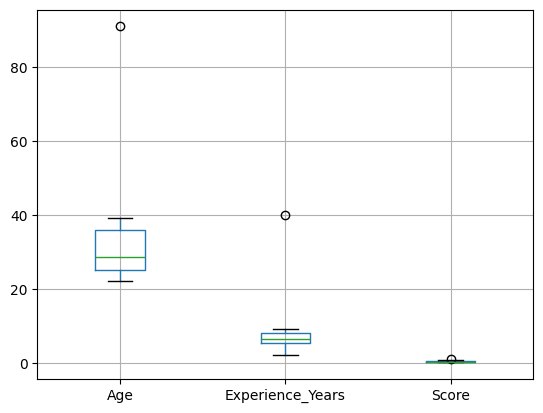

In [ ]:
df.boxplot()

### 4.1. MinMaxScaler

Scales features to a specified range, usually [0, 1]. Each feature's minimum and maximum values are transformed to the bounds of the desired range.

In [ ]:
# Minmax scaler


Age  Experience_Years     Score
0  0.000000          0.052632  0.285793
1  0.246377          0.184211  0.519622
2  0.202899          0.157895  1.000000
3  0.086957          0.105263  0.207458
4  0.043478          0.157895  0.401407
5  0.028986          0.078947  0.816979
6  0.202899          0.131579  0.182784
7  0.043478          0.000000  0.000000
8  0.101449          0.105263  0.256170
9  1.000000          1.000000  0.101424

In [ ]:
# Display boxplot

<Axes: >

In [ ]:
# Using sklearn library


Age  Experience_Years     Score
0  0.000000          0.052632  0.285793
1  0.246377          0.184211  0.519622
2  0.202899          0.157895  1.000000
3  0.086957          0.105263  0.207458
4  0.043478          0.157895  0.401407
5  0.028986          0.078947  0.816979
6  0.202899          0.131579  0.182784
7  0.043478          0.000000  0.000000
8  0.101449          0.105263  0.256170
9  1.000000          1.000000  0.101424

<Axes: >

### 4.2. StandardScaler

`StandardScaler` makes each feature in the data centered around zero and adjusts its spread to be consistent as 1 unit variance.

In [ ]:
# Standard scaler


Age  Experience_Years     Score
0 -0.699332         -0.531085 -0.302873
1  0.181308         -0.048280  0.472219
2  0.025901         -0.144841  2.064568
3 -0.388518         -0.337963 -0.562537
4 -0.543925         -0.144841  0.080361
5 -0.595727         -0.434524  1.457891
6  0.025901         -0.241402 -0.644326
7 -0.543925         -0.724207 -1.250216
8 -0.336715         -0.337963 -0.401069
9  2.875030          2.945108 -0.914019

In [ ]:
# Display boxplot

<Axes: >

In [ ]:
# using sklearn


Age  Experience_Years     Score
0 -0.699332         -0.531085 -0.302873
1  0.181308         -0.048280  0.472219
2  0.025901         -0.144841  2.064568
3 -0.388518         -0.337963 -0.562537
4 -0.543925         -0.144841  0.080361
5 -0.595727         -0.434524  1.457891
6  0.025901         -0.241402 -0.644326
7 -0.543925         -0.724207 -1.250216
8 -0.336715         -0.337963 -0.401069
9  2.875030          2.945108 -0.914019

<Axes: >

### 4.3. Robust Scaler

`RobustScaler` is not skewed by outliers and thre spread reflect the actual distribution

Age  Experience_Years     Score
0 -0.590909         -0.909091  0.049190
1  0.954545          0.909091  0.825731
2  0.681818          0.545455  2.421057
3 -0.045455         -0.181818 -0.210960
4 -0.318182          0.545455  0.433140
5 -0.409091         -0.545455  1.813247
6  0.681818          0.181818 -0.292902
7 -0.318182         -1.636364 -0.899925
8  0.045455         -0.181818 -0.049190
9  5.681818         12.181818 -0.563099

<Axes: >

Age  Experience_Years     Score
0 -0.590909         -0.909091  0.049190
1  0.954545          0.909091  0.825731
2  0.681818          0.545455  2.421057
3 -0.045455         -0.181818 -0.210960
4 -0.318182          0.545455  0.433140
5 -0.409091         -0.545455  1.813247
6  0.681818          0.181818 -0.292902
7 -0.318182         -1.636364 -0.899925
8  0.045455         -0.181818 -0.049190
9  5.681818         12.181818 -0.563099

<Axes: >

## 5. Encoding categorical data

In [51]:
df = get_df(6)
df

Color    Size Category
0    Red   Small        A
1   Blue  Medium        B
2  Green   Large        A
3    Red   Small        B
4   Blue   Large        A
5  Green  Medium        C
6  Green   Small        C
7    Red   Large        B

### 5.1. Ordinal Encoder

In [56]:
df = get_df(6)

from sklearn.preprocessing import OrdinalEncoder

scaler = OrdinalEncoder()
transformed_data = scaler.fit_transform(df[['Size']])
df['Size'] = transformed_data
df

Color  Size Category
0    Red   2.0        A
1   Blue   1.0        B
2  Green   0.0        A
3    Red   2.0        B
4   Blue   0.0        A
5  Green   1.0        C
6  Green   2.0        C
7    Red   0.0        B

### 5.2. One-hot Encoder

In [ ]:
df = get_df(6)
df_onehot = pd.get_dummies(df[['Color']]).astype('int16')
df = pd.concat([df, df_onehot], axis=1)
df

Color    Size Category  Color_Blue  Color_Green  Color_Red
0    Red   Small        A           0            0          1
1   Blue  Medium        B           1            0          0
2  Green   Large        A           0            1          0
3    Red   Small        B           0            0          1
4   Blue   Large        A           1            0          0
5  Green  Medium        C           0            1          0
6  Green   Small        C           0            1          0
7    Red   Large        B           0            0          1

# References

- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/modules/preprocessing.html